# 📚 Parte teórica - MIGUEL DIAZ
#Responde en una celda de tipo Markdown en tu notebook las siguientes preguntas:

# 🤔⁉️**¿Qué es una red neuronal artificial? Describe brevemente sus componentes principales (neuronas, pesos, funciones de activación, capas).**

Una red neuronal artifical es una herramienta utilizada en machine learning y deep learning el cual simula el funcionamiento del cerebro humano. Es muy util para procesar datos complejos y bases de datos extensas. Una red neuronal está compuesta por neuronas, pesos, funciones de activación y capas.

🧠**Neuronas**:  las neuronas son los componentes que procesan la información, ellas reciben una entrada, las transfomra y envía una salida a la siguiente capa.

⚖️ **Pesos:** Los pesos determinan la importancia de cada iteración entre neuronas, los pesos se van trasformando en el entrenamiento.

🚀**Funciones de activación:** La función de activación tiene la función de transformas la salida de cada neurona y tiene varias modalidades: RelU, Sigmoid, Softmax.

📊 **Capas:** Las capas organizan el modelo en distinto niveles o etapas, existen capas de salida, entrada, y ocultas. Dichas capas al igual que el número de neuronas se pueden modificar para encontrar un nivel óptimo en el modelo.


# 🤔⁉️**Explica qué es el algoritmo de backpropagation y por qué es importante en el entrenamiento de redes.**

El back propagation o propagación hacia átras es esencial en las redes neuronales dado que permite a las neuronas ajustar los pesos para minimizar los errores.

Entonces, la propagación hacia delante predice una salida basado con la información que recibió. Después, esa salida es comparada con la predicicón real y calcula la función de perdida.

Después viene la propagación hacia átras, la cual usa el grandiante descendente para ajustar los pesos de la salida hacia la entrada, corrigiendo el problema.

Finalmente, el proceso se repite por cada entrada y salida para mejorar la eficacia.

Ejemplo: Cuando se presenta un examen y se comete errores, el profesor califica y explica los errores. En la próxima evaluación el alumno aprenderá de sus errores,  y podrá obtener una mejor calificación.

Este algoritmo es fundamental dado que es la función que permite a las neuronas artificales hacer lo que nuestras neuronas reales hacen. Prueba, error, aprendizaje.


# 🤔⁉️ **Describe al menos tres funciones de activación comunes y menciona cuándo conviene utilizar cada una (ReLU, sigmoide, tanh).**
**bold text**
**⚡🚀ReLU (Rectified Linear Unit):** Es uno de las funciones más usadas actualmente en redes neuronales. Con ReLU se evita el problema de gradientes pequeños, y es usada en las capas ocultas. Es decir mantiene el flujo constante de la información sin importar sus pesos, por más pequeño que sea.

**🔄📊Sigmoide:** La función sigmoide es muy popular usarla en la capa de salida, dado que convierte los valores en un rango de 0 y 1, lo cual sirve mucho para probabilidades. Por ejemplo, en el ejercicio que se realizará acontinuación es esencial para la clasificación de la probabilidad de un fraude o no.

**🔥🔄Tanh:** La función Tanh es útil cuando se tienen valores tanto negativos como positivos en la data. Se usa en las capas ocultas, para mantener el punto de referencia en 0. Se evitan los valores demasiado extremos.

# 🚀 🔍 **Red Neuronal para Detección de Fraude Financiero**💰⚠️


In [ ]:
# Se importan las librerias necesarias para realizar todos los ejercicios.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# 🚀**Carga del dataset:**

---


Utiliza el archivo disponible en el siguiente enlace: fraud_dataset.csvEnlaces a un sitio externo.

In [ ]:
# Se llama a la base de datos y se nombra df.
df = pd.read_csv("/creditcard.csv")

In [ ]:
#Preprocesamiento:

#🚀Verifica nulos y tipos de datos.
print (f"Descipción del Dataset: \n {df.describe()}\n")
#🚀Verifica nulos.
print (f"Estos son los vlaores nulos: \n {df.isnull().sum()}\n")

# Tipos de datos.
print (f"Estos son los tipos de datos: \n {df.dtypes}")

df.fillna(df.mean(), inplace=True)
print (f"Estos son los vlaores nulos después de imputar: \n {df.isnull().sum()}\n")


Descipción del Dataset: 
                 Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  1.168375e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

Estos son los vlaores nulos: 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V

In [ ]:

#🚀Normaliza las características numéricas☻.
# Excluimos las variables que no se van a normalizar.
excluir = ["Time", "Amount","Class"]
df_sin = df.drop(excluir, axis=1)
# Se dejan las variables numéricas.
columnas_numericas = [col for col in df_sin.columns if col not in excluir]

# Se escalan los datos y se usa una capa de normalización de Keras en el preprocesamiento
import tensorflow as tf
from tensorflow.keras.layers import Normalization

# Se elije las variables X y Y.
X = df_sin
Y = df["Class"]

# Se convierte  X en un Array
X_array = np.array(X, dtype=np.float32)

# Se imprimen los datos antes de la normalización.
print(f" Data (Max-Min) pre normalization 1Column: {np.max(X.iloc[:,0]):0.2f}, {np.min(X.iloc[:,0]):0.2f}")

print(f"Data (Max-Min) pre normalization 2Column: {np.max(X.iloc[:,1]):0.2f}, {np.min(X.iloc[:,1]):0.2f}")

# Se agrega una capa en el preprocesamiento para normalizar los datos.
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_array)
X_normalized = norm_l(X_array)


# Se imprimen algunas pruebas para saber si la normalización sirve

print(f" Data (Max-Min) post normalization 1Column: {np.max(X_normalized[:,0]):0.2f}, {np.min(X_normalized[:,0]):0.2f}")

print(f"Data (Max-Min) post normalization 2Column: {np.max(X_normalized[:,1]):0.2f}, {np.min(X_normalized[:,1]):0.2f}\n\n ")

print(f"Media después de la normalización:\n\n {np.mean(X_normalized.numpy(), axis=0)}")
print(f"Desviación estándar después de la normalización:\n\n {np.std(X_normalized.numpy(), axis=0)}")

#Si hay clases desbalanceadas, menciona cómo se manejaría (sin necesidad de aplicar técnicas de balanceo en esta actividad).

 Data (Max-Min) pre normalization 1Column: 2.45, -56.41
Data (Max-Min) pre normalization 2Column: 22.06, -72.72
 Data (Max-Min) post normalization 1Column: 1.25, -28.80
Data (Max-Min) post normalization 2Column: 13.36, -44.04

 
Media después de la normalización:

 [ 5.6184558e-07  1.4833313e-07  3.9028154e-07  2.3153585e-07
  2.6182178e-07 -6.6968717e-08  4.0555989e-07  2.6964349e-07
  3.0737996e-07  1.2528388e-07  1.3475133e-06 -2.0072477e-07
  5.5796257e-08  2.6554682e-07  2.5648960e-06 -9.5138539e-08
 -4.5853429e-10 -1.9573042e-07 -4.4306532e-08 -1.1060764e-07
  1.6823616e-07 -5.1156752e-07  2.1536254e-08  7.6085218e-09
 -9.0570319e-07 -8.4888491e-08 -2.0416886e-08  1.4220972e-08]
Desviación estándar después de la normalización:

 [0.9999566  0.9999286  0.999963   0.99997395 0.9999539  0.9999581
 0.99994415 0.9998856  0.99995095 0.9999383  0.99996495 0.999945
 0.9999528  0.999945   0.9999643  0.9999521  0.9999487  0.9999615
 0.99995786 0.99991673 0.99992585 0.9999836  0.9999071  0.

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


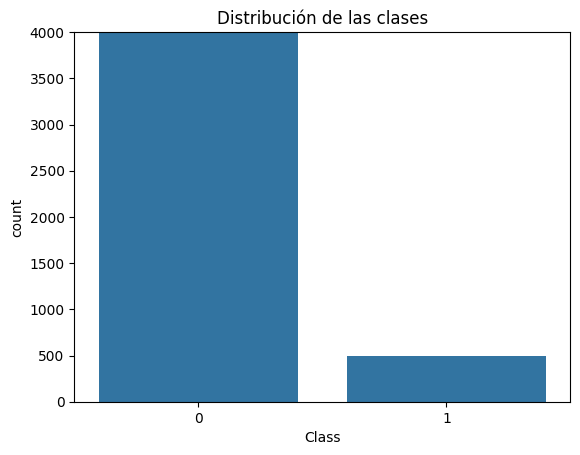

In [ ]:
#🚀Si hay clases desbalanceadas, menciona cómo se manejaría (sin necesidad de aplicar técnicas de balanceo en esta actividad).
# Se pasa el tipo float a número entero
df["Class"] = df["Class"].astype(int)
# Se imprime el porcentaje por cada clase: 0: No Faude. 1: Fraude
print(df["Class"].value_counts(normalize=True) * 100)
import seaborn as sns
import matplotlib.pyplot as plt

# Se grafican las clases.  Se limita hasta 4000 para ver las magnitudes de los dos.
sns.countplot(x=df["Class"])
plt.ylim(0, 4000)
plt.title("Distribución de las clases")
plt.show()

#✅ Saber si existe un desbalanceo en las clases es importante porque muchas veces los modelos de ML favorecen a la clase mayoritaria, y terminan con una efectividad del 99%, sin embargo, en fraudes es importante detectar las anomalias.

#✅ En este caso, donde los fraudes representan solo el 0.2% de la información. Se recomienda usar **Oversampling SMOTE**, dado que crea ejemplos sintéticos de la clase minoritaria para así tener más información en el momento del entrenamiento.


# 🚀**Modelo base con Keras**:

# Crea un modelo simple con al menos 1 capa oculta (activación ReLU) y una capa de salida (sigmoide)

# Compila el modelo con binary_crossentropy y métricas como accuracy.

# Entrena el modelo y evalúa su rendimiento sobre un conjunto de prueba.


In [ ]:
# Se crea el model base con la informacion
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Se definen las variables de entrenamiento y test tanto de X como de Y.

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized.numpy(), Y, test_size=0.2, random_state=42, stratify=Y)

# Se entrena el modelo con 64 neuronas en la primera capa con relu , y la segunda capa con 1 neurona con Sigmoide dado que el resultado es 0  o 1.

model = Sequential([
     Input(shape=(X_normalized.shape[1],)),
    Dense(64, activation="relu"), # Capa oculta
    Dense(1, activation="sigmoid"), # Capa de salida para clasificación binaria.
])

# Se compila el modelo de 64 neuronas.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_64 = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)
# Se imprimer el resultado con 64 neuronas.
model.summary()

# Se entrena el modelo con 64 neuronas en la primera capa con relu , y la segunda capa con 1 neurona con Sigmoide dado que el resultado es 0  o 1.
model_50 = Sequential([
     Input(shape=(X_normalized.shape[1],)),
    Dense(50, activation="relu"), # Capa oculta
    Dense(1, activation="sigmoid"), # Capa de salida para clasificación binaria.
])

# Se compila el modelo de 50 neuronas.
model_50.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_50 = model_50.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)
# Se imprimer el resultado con 50 neuronas.
model_50.summary()


# Se imprime los resultados con 64 neuronas.
print(f"Modelo con 64 neuronas - Precisión en entrenamiento: {history_64.history['accuracy'][-1]:.4f}")
print(f"Modelo con 64 neuronas - Precisión en validación: {history_64.history['val_accuracy'][-1]:.4f}")

# Se imprime los resultados ocn 50 neuronas.
print(f"Modelo con 50 neuronas - Precisión en entrenamiento: {history_50.history['accuracy'][-1]:.4f}")
print(f"Modelo con 50 neuronas - Precisión en validación: {history_50.history['val_accuracy'][-1]:.4f}")



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9871 - loss: 0.0424 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9995 - loss: 0

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,765 (22.52 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,844 (15.02 KB)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9725 - loss: 0.0670 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9995 - loss: 0

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 50)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,505 (17.60 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,004 (11.74 KB)

Modelo con 64 neuronas - Precisión en entrenamiento: 0.9995
Modelo con 64 neuronas - Precisión en validación: 0.9992
Modelo con 50 neuronas - Precisión en entrenamiento: 0.9995
Modelo con 50 neuronas - Precisión en validación: 0.9995



#🚀**Grafica la curva de pérdida y precisión para entrenamiento y validación.**

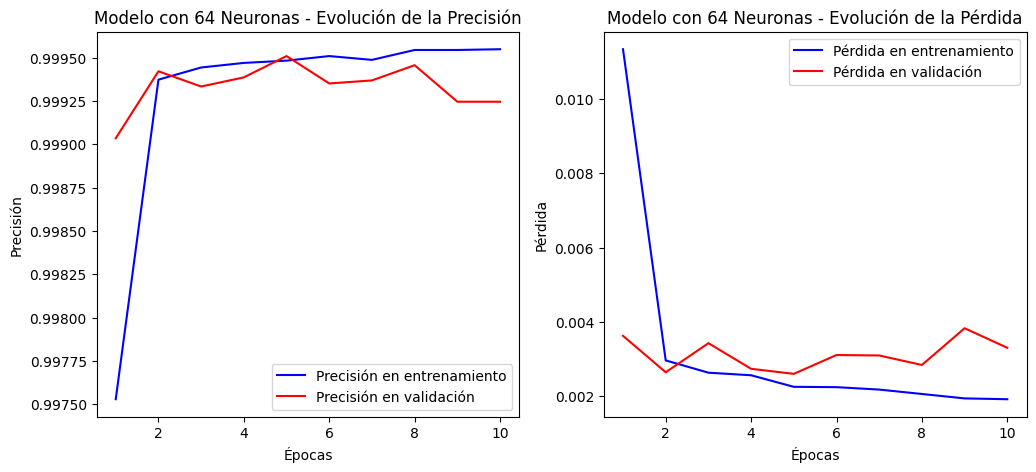

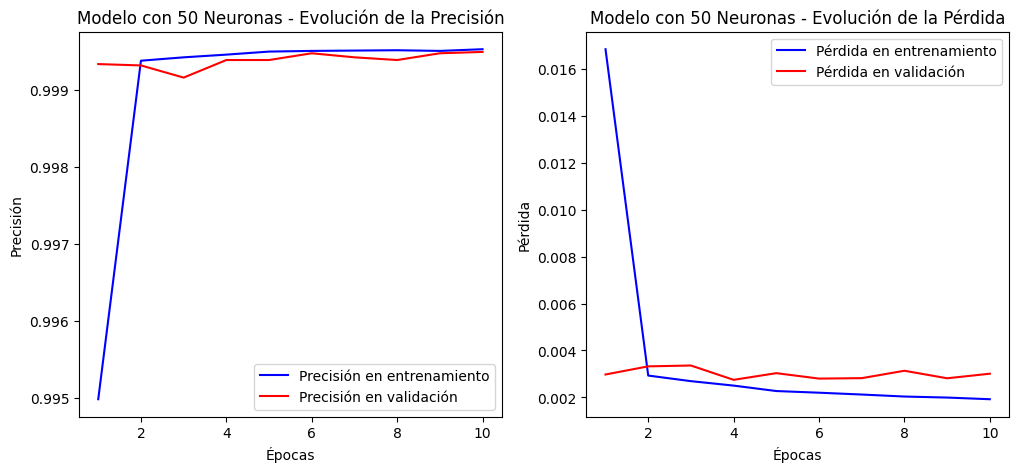

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la evolución del entrenamiento
def plot_training_history(history, title):
    epochs = range(1, len(history.history["accuracy"]) + 1)

    plt.figure(figsize=(12, 5))

    # Gráfico de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history["accuracy"], "b", label="Precisión en entrenamiento")
    plt.plot(epochs, history.history["val_accuracy"], "r", label="Precisión en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.title(f"{title} - Evolución de la Precisión")
    plt.legend()

    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history["loss"], "b", label="Pérdida en entrenamiento")
    plt.plot(epochs, history.history["val_loss"], "r", label="Pérdida en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.title(f"{title} - Evolución de la Pérdida")
    plt.legend()

    plt.show()

# 🚀 Visualizar resultados de ambos modelos
plot_training_history(history_64, "Modelo con 64 Neuronas")
plot_training_history(history_50, "Modelo con 50 Neuronas")

# 🚀**Interpreta los resultados obtenidos.**

# ✅Con esta comparación del modelo neuronal keras entre 64 neuronas y 50 neuronas en la primera capa oculta se deonta un buen rendimeinto entre los dos modelos, con precision arriba del 95%.

# ✅Sin embargo, tanto en la medición como en los gráficos es claro que el modelo con 50 neuronas tiene una menor perdida, y tienen un menor gasto computacional, por tanto, es el modelo más indicado.

# 🧬**Reto adicional (opcional pero recomendado) – Regularización**

# 📌Agrega alguna de las siguientes técnicas para mejorar la generalización del modelo:

# 📌Dropout() entre capas ocultas (ej. Dropout(0.3))

In [ ]:
from tensorflow.keras.layers import Dropout


model_con_dropout_64 = Sequential([
    Input(shape=(X_normalized.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),  # Apaga el 30% de las neuronas en cada iteración
    Dense(1, activation="sigmoid")
])

# Se compila el modelo de 64 neuronas.
model_con_dropout_64.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_64_dropout = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Se imprimer el resultado con 50 neuronas.
model_con_dropout_64.summary()

model_con_dropout_50 = Sequential([
    Input(shape=(X_normalized.shape[1],)),
    Dense(50, activation="relu"),
    Dropout(0.3),  #  Apaga el 30% de las neuronas en cada iteración
    Dense(1, activation="sigmoid")
])

# Se compila el modelo de 50 neuronas.
model_con_dropout_50.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Se entrena el modelo con 50 neuronas.
history_50_dropout = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Se imprimer el resultado con 50 neuronas.
model_con_dropout_50.summary()


# Se imprime los resultados con 64 neuronas.
print(f"Modelo con 64 neuronas - Precisión en entrenamiento: {history_64_dropout.history['accuracy'][-1]:.4f}")
print(f"Modelo con 64 neuronas - Precisión en validación: {history_64_dropout.history['val_accuracy'][-1]:.4f}")

# Se imprime los resultados ocn 50 neuronas.
print(f"Modelo con 50 neuronas - Precisión en entrenamiento: {history_50_dropout.history['accuracy'][-1]:.4f}")
print(f"Modelo con 50 neuronas - Precisión en validación: {history_50_dropout.history['val_accuracy'][-1]:.4f}")

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9998 - loss: 8.5038e-04 - val_accuracy: 0.9994 - val_loss: 0.0040
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9998 - loss: 7.9660e-04 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9998 - loss: 8.1889e-04 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9997 - loss: 8.7615e-04 - val_accuracy: 0.9994 - val_loss: 0.0049
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9998 - loss: 8.3860e-04 - val_accuracy: 0.9994 - val_loss: 0.0046
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9998 - loss: 8.2662e-04 - val_accuracy: 0.9992 - val_loss: 0.0064
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9998 - loss: 9.7280e-04 - val_accuracy: 0.9993 - val_loss: 0.0051
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9998 - loss: 5.6945e-04 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9998 - loss: 9.7974e-04 - val_accuracy: 0.9994 - val_loss: 0.0058
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9998 - loss: 9.2124e-04 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9998 - loss: 7.3939e-04 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9998 - loss: 8.8663e-04 - val_accuracy: 0.9994 - val_loss: 0.0063
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9998 - loss: 7.7169e-04 - val_accuracy: 0.9994 - val_loss: 0.0061
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9998 - loss: 5.6149e-04 - val_accuracy: 0.9993 - val_loss: 0.0060
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step 

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 50)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

Modelo con 64 neuronas - Precisión en entrenamiento: 0.9998
Modelo con 64 neuronas - Precisión en validación: 0.9993
Modelo con 50 neuronas - Precisión en entrenamiento: 0.9998
Modelo con 50 neuronas - Precisión en validación: 0.9993


# **Gráficas con Dropout**

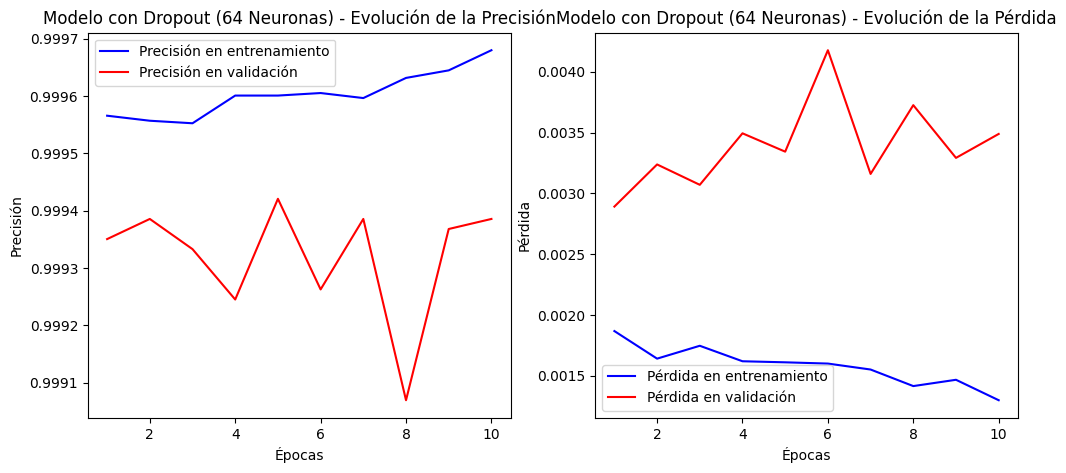

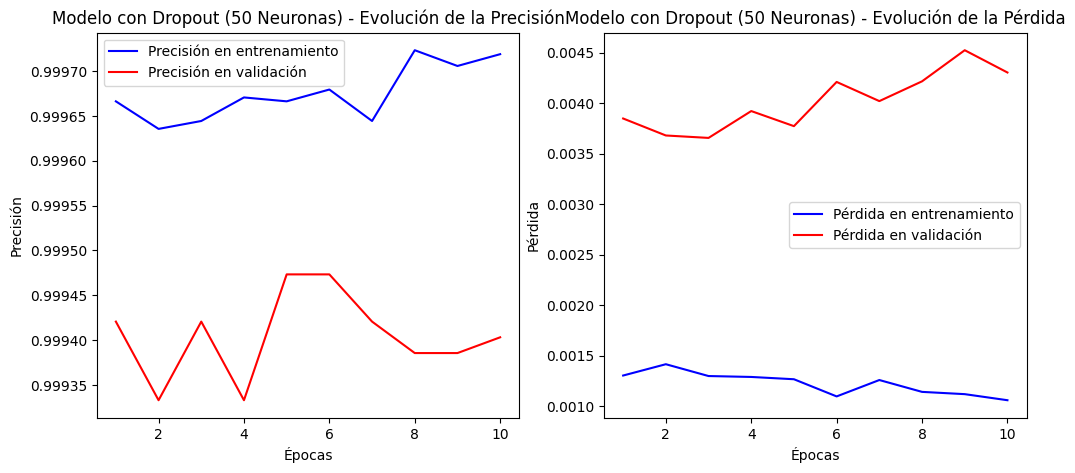

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la evolución del entrenamiento
def plot_training_history(history, title):
    epochs = range(1, len(history.history["accuracy"]) + 1)

    plt.figure(figsize=(12, 5))

    # Gráfico de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history["accuracy"], "b", label="Precisión en entrenamiento")
    plt.plot(epochs, history.history["val_accuracy"], "r", label="Precisión en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.title(f"{title} - Evolución de la Precisión")
    plt.legend()


    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history["loss"], "b", label="Pérdida en entrenamiento")
    plt.plot(epochs, history.history["val_loss"], "r", label="Pérdida en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.title(f"{title} - Evolución de la Pérdida")
    plt.legend()

    plt.show()


# 🚀 Visualizar resultados de ambos modelos con Dropout
plot_training_history(history_64_dropout, "Modelo con Dropout (64 Neuronas)")
plot_training_history(history_50_dropout, "Modelo con Dropout (50 Neuronas)")

#📌**Regularización L2 o L1 en las capas densas**:



In [ ]:
from tensorflow.keras.regularizers import l2


from tensorflow.keras.layers import Dropout


model_con_dropout_64_l2 = Sequential([
    Input(shape=(X_normalized.shape[1],)),
    Dense(64, activation="relu", kernel_regularizer=l2(0.01)),  #  Aplica regularización L2 con un factor de 0.01
    Dropout(0.3),  #  Apaga el 30% de las neuronas en cada iteración
    Dense(1, activation="sigmoid")
])

# Se compila el modelo de 64 neuronas.
model_con_dropout_64_l2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_64_dropout_l2 = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Se imprimer el resultado con 50 neuronas.
model_con_dropout_64_l2.summary()

model_con_dropout_50_l2 = Sequential([
    Input(shape=(X_normalized.shape[1],)),
    Dense(50, activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.3),  #  Apaga el 30% de las neuronas en cada iteración
    Dense(1, activation="sigmoid")
])

# Se compila el modelo de 50 neuronas.
model_con_dropout_50_l2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Se entrena el modelo con 50 neuronas.
history_50_dropout_l2 = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Se imprimer el resultado con 50 neuronas.
model_con_dropout_50_l2.summary()


# Se imprime los resultados con 64 neuronas.
print(f"Modelo con 64 neuronas - Precisión en entrenamiento: {history_64_dropout_l2.history['accuracy'][-1]:.4f}")
print(f"Modelo con 64 neuronas - Precisión en validación: {history_64_dropout_l2.history['val_accuracy'][-1]:.4f}")

# Se imprime los resultados ocn 50 neuronas.
print(f"Modelo con 50 neuronas - Precisión en entrenamiento: {history_50_dropout_l2.history['accuracy'][-1]:.4f}")
print(f"Modelo con 50 neuronas - Precisión en validación: {history_50_dropout_l2.history['val_accuracy'][-1]:.4f}")


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9998 - loss: 5.8372e-04 - val_accuracy: 0.9993 - val_loss: 0.0072
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9998 - loss: 6.3372e-04 - val_accuracy: 0.9993 - val_loss: 0.0074
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9998 - loss: 6.4011e-04 - val_accuracy: 0.9991 - val_loss: 0.0076
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9998 - loss: 5.9916e-04 - val_accuracy: 0.9994 - val_loss: 0.0070
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9998 - loss: 7.6186e-04 - val_accuracy: 0.9993 - val_loss: 0.0072
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9999 - loss: 4.7642e-04 - val_accuracy: 0.9993 - val_loss: 0.0073
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9998 - loss: 6.2578e-04 - val_accuracy: 0.9992 - val_loss: 0.0082
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step 

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9999 - loss: 4.0188e-04 - val_accuracy: 0.9995 - val_loss: 0.0076
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9999 - loss: 5.7220e-04 - val_accuracy: 0.9993 - val_loss: 0.0084
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9998 - loss: 5.5301e-04 - val_accuracy: 0.9994 - val_loss: 0.0079
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9999 - loss: 5.9002e-04 - val_accuracy: 0.9993 - val_loss: 0.0085
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9999 - loss: 5.3410e-04 - val_accuracy: 0.9993 - val_loss: 0.0084
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9999 - loss: 3.7744e-04 - val_accuracy: 0.9994 - val_loss: 0.0083
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9998 - loss: 5.3112e-04 - val_accuracy: 0.9993 - val_loss: 0.0087
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step 

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 50)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

Modelo con 64 neuronas - Precisión en entrenamiento: 0.9998
Modelo con 64 neuronas - Precisión en validación: 0.9994
Modelo con 50 neuronas - Precisión en entrenamiento: 0.9999
Modelo con 50 neuronas - Precisión en validación: 0.9993


# **Gráficos con L2 y dropout**

<Figure size 640x480 with 0 Axes>

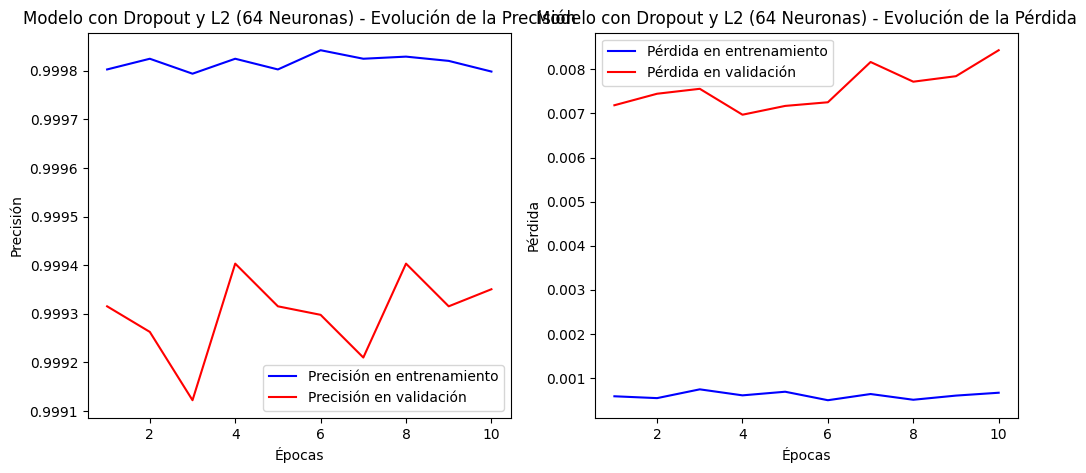

<Figure size 640x480 with 0 Axes>

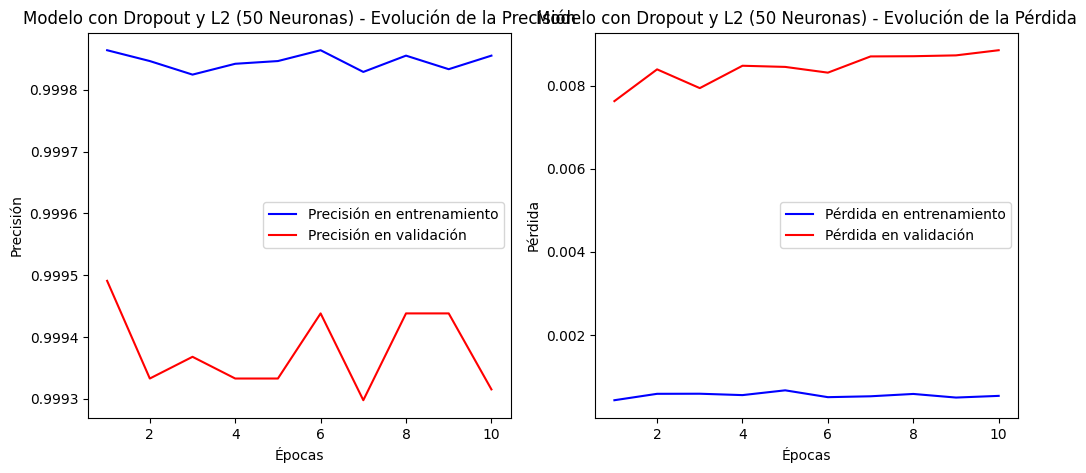

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la evolución del entrenamiento
def plot_training_history(history, title):
    epochs = range(1, len(history.history["accuracy"]) + 1)

    plt.figure(figsize=(12, 5))

    # Gráfico de precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history["accuracy"], "b", label="Precisión en entrenamiento")
    plt.plot(epochs, history.history["val_accuracy"], "r", label="Precisión en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.title(f"{title} - Evolución de la Precisión")
    plt.legend()


    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history["loss"], "b", label="Pérdida en entrenamiento")
    plt.plot(epochs, history.history["val_loss"], "r", label="Pérdida en validación")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.title(f"{title} - Evolución de la Pérdida")
    plt.legend()

    plt.show()


#  Visualizar resultados de ambos modelos con Dropout
plt.figure()  #  Separador visual antes de graficar el primer modelo
plot_training_history(history_64_dropout_l2, "Modelo con Dropout y L2 (64 Neuronas)")

plt.figure()  #  Separador visual antes de graficar el segundo modelo
plot_training_history(history_50_dropout_l2, "Modelo con Dropout y L2 (50 Neuronas)")


# ✔ 🎯🏆 →  Después de realizar la comparación de 50 y 64 neuronas en tres ( modelos 1. modelo normal con dos capas, 2. modelo con dropout, 3. Modelo con dropout y L2 ) Se estima que el mejor rendimiento se encuentra en el modelo con dropout y l2 con 52 neuronas.

# ✔ 🎯🏆 →  Todos los modelos rinden eficientemente, sin embargo, con la tercera ópcion el gasto computacional es menor, dado que se llegan a resultados óptimos sin necesidad de tener 64 neuronas. Además, al apagar el 30% de las neuronas y aplicar l2, la perdida en el entrenamiento es mucho más estable sin tantas variantes, a comparación de las otras dos opciones.